<div class="alert alert-block alert-info"><h1>各省新冠病毒确诊人数的数据可视化(六边形箱图)</h1></div>

<div class="alert alert-block alert-success"> <h3>作者：1907020121 程元烁 & 1907040116 陈荣灿</h3></div> 

## 1 代码简介

疫情地图的六边形箱图画法

## 2 数据准备
数据来源:  [丁香园](https://ncov.dxy.cn/ncovh5/view/pneumonia?scene=2&clicktime=1579582766&enterid=1579582766&from=groupmessage&isappinstalled=0)
> 储存为包含省名称，确诊人数，横纵坐标的csv文件，储存格式如下：

|province|number|x|y|   
|  ----  | ----  |----|----|
| 湖北  | 33366 |5.6|5.25|
| 浙江  | 1131 | 7.6|4.2| 
|......|......|......|......| 

## 3 详细代码

### 3.1 加载库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 3.2 数据处理

In [2]:
#读取csv文件,返回类型为DataFrame类型
def read_data():
    return pd.read_csv('C:/Users/Lenovo/Desktop/province_data.csv',encoding='utf-8-sig')

#将数据分段并绑定颜色
#data['number']为一个类数组，储存各省确诊人数
#data变量储存函数read_data()的返回对象
def colors(index,data):
    #利用pandas.cut()函数分割数据，将数据划分为六个左闭右开的区间，六个标签内容为六个区间的值在地图上的映射颜色
    #index为省在文件中顺序的索引
    return pd.cut(data['number'], [0,10,100,500,1000,10000,50000],right=False,labels=['#fdebcf','#f59e83','#e55a4e','#cb2a2f','#811921','#4f070d'],retbins=False)[index]

### 3.3 画图

In [3]:
def draw(ax,data): 
    for i in range(len(data)):
            #这里其实是画了34个六边形的“点”
            #参数为横纵坐标，点的类型(“h”代表六边形)，颜色，点的大小
            ax.plot(data['x'][i],data['y'][i],'h',color=colors(i,data),markersize=50)
            
            #增强字体颜色与图形颜色的对比度，这里，在省人数较多即图形颜色较深时，字体颜色选择白色，其他用黑色
            if data['number'][i]>=500:
                text_color = 'w'
            else:
                text_color = 'k'
            #将省名与人数标在相应位置，为了使省名与数字位于图形中央，text的位置坐标稍作修改
            plt.text(data['x'][i],data['y'][i],data['province'][i]+'\n\n '+str(int(data['number'][i])),horizontalalignment='center',verticalalignment='center',color=text_color)

### 3.4 隐藏边框及刻度

In [4]:
def hide(ax):
    for spine in ax.spines.values():
        spine .set_visible(False)
    #以上为隐藏上、右、下、左边框，以下为隐藏x，y轴刻度
    plt.xticks([])
    plt.yticks([])

## 4 执行代码

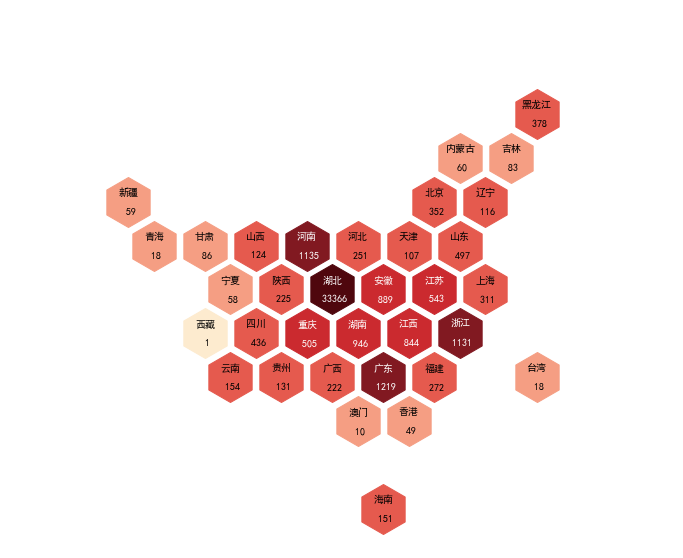

In [5]:
fig, ax = plt.subplots(figsize=(12,10)) #初始化，设置figure的大小
ax.axis([0.5, 11, -1, 12]) #设置轴线的起止位置刻度

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签

data=read_data() #读取csv文件

draw(ax,data) #画图
hide(ax) #隐藏边框与刻度

#plt.savefig('C:/Users/Lenovo/Desktop/hexbin.png') #保存图片
plt.show()